In [1]:
df<-read.csv('titanic_train_data.csv')
head(df)
str(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [22]:

#NA values
apply(df,MARGIN=2,FUN=function(x) sum(is.na(x)))

PassengerId      Survived        Pclass          Name           Sex 
            0             0             0             0             0 
          Age         SibSp         Parch        Ticket          Fare 
          177             0             0             0             0 
        Cabin      Embarked  above_median Alter_bekannt 
            0             0             0             0

1   2   3 
136  87 119

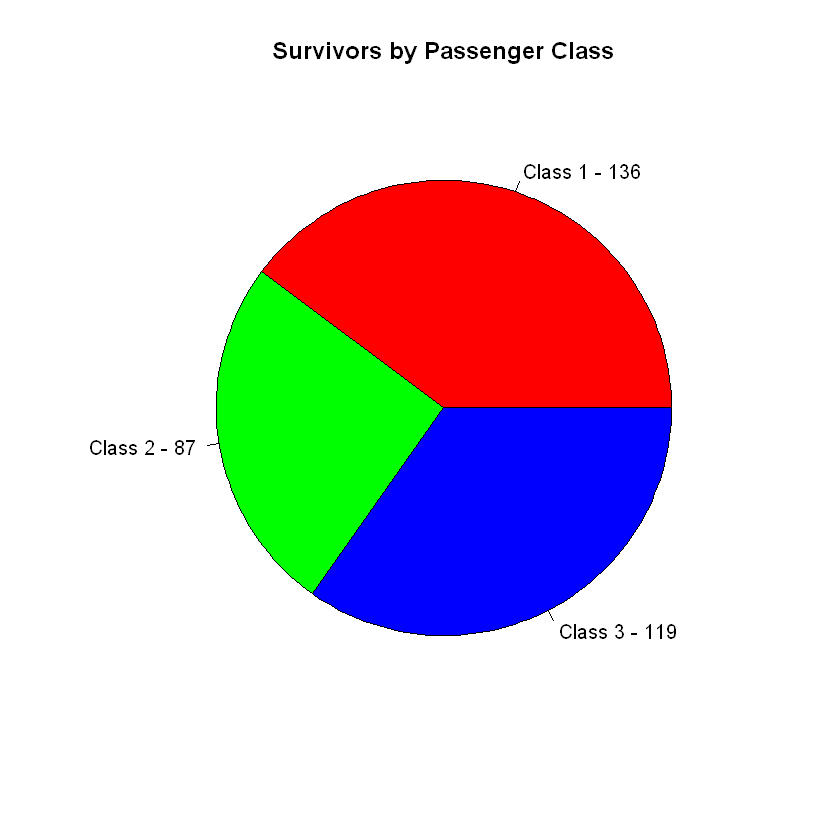

In [11]:
# Anzahl Überlebender nach Klasse:
(survivors_by_class<-tapply(df$Survived,df$Pclass ,sum))



labels <- paste("Class", names(survivors_by_class), "-",survivors_by_class)

pie(survivors_by_class, 
    labels = labels,
    main = "Survivors by Passenger Class",
    col = rainbow(length(survivors_by_class)))



1         2         3 
0.6296296 0.4728261 0.2423625

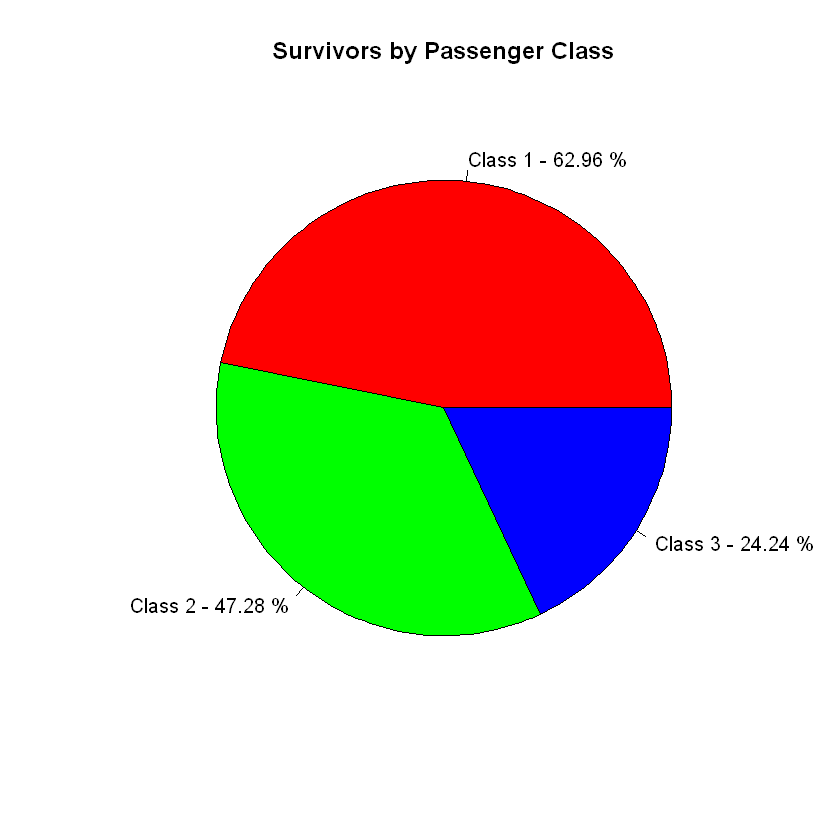

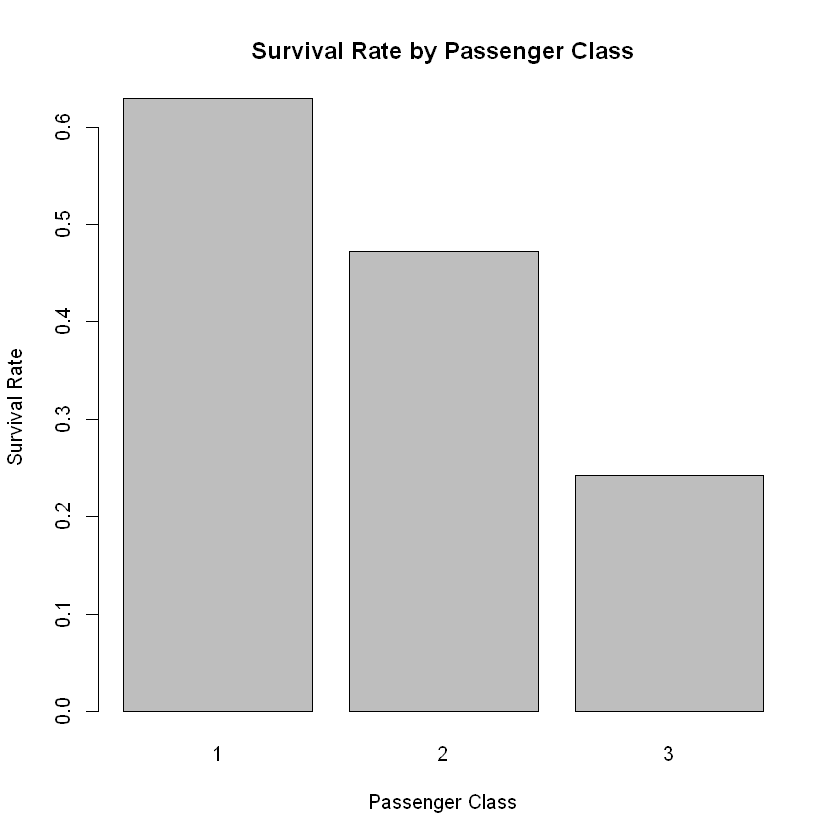

In [17]:
# Anteil Überlebender in jeder Klasse: 


(Anteil<-tapply(df$Survived,df$Pclass ,mean))
labels <- paste("Class", names(survivors_by_class), "-",100*round(Anteil,4),'%')
pie(Anteil, 
    labels = labels,
    main = "Survivors by Passenger Class",
    col = rainbow(length(survivors_by_class)))

barplot(Anteil,main = "Survival Rate by Passenger Class",
  xlab = "Passenger Class",
  ylab = "Survival Rate",)


   
      1   2   3
  0  80  97 372
  1 136  87 119

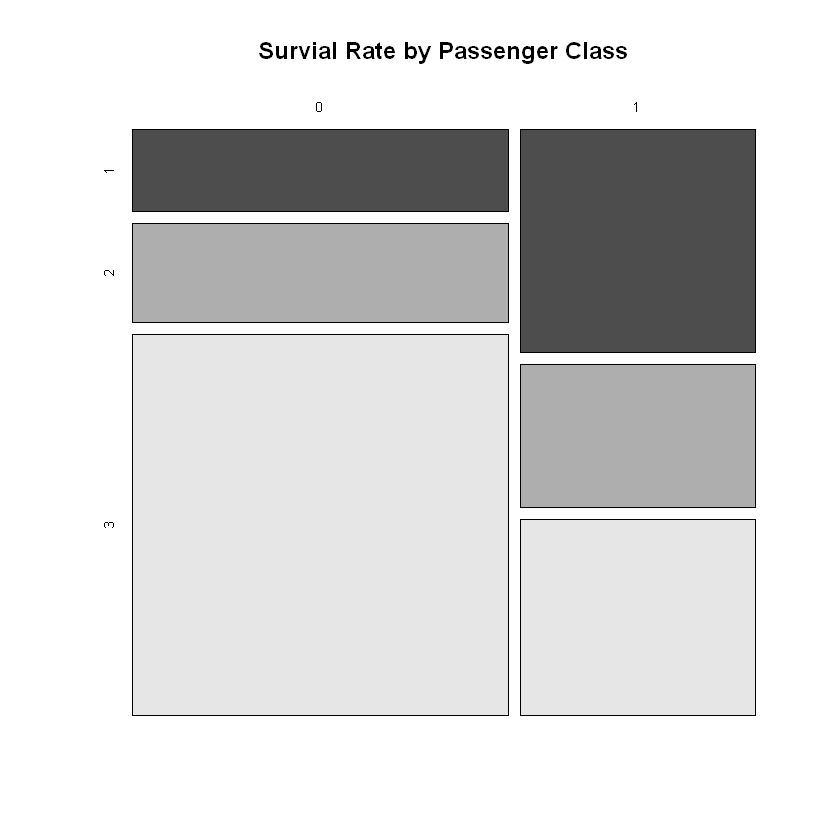

In [25]:
# Independency test
tab_class<-table(df$Survived,df$Pclass)
tab_class

mosaicplot(tab_class,main='Survial Rate by Passenger Class',color=T)

In [26]:
chisq.test(tab_class)
#  H0 wird verworfen. (Es besteht ein starker Zusammenhang zwischen
#Survival rate und Class) 


	Pearson's Chi-squared test

data:  tab_class
X-squared = 102.89, df = 2, p-value < 2.2e-16


female      male 
0.7420382 0.1889081

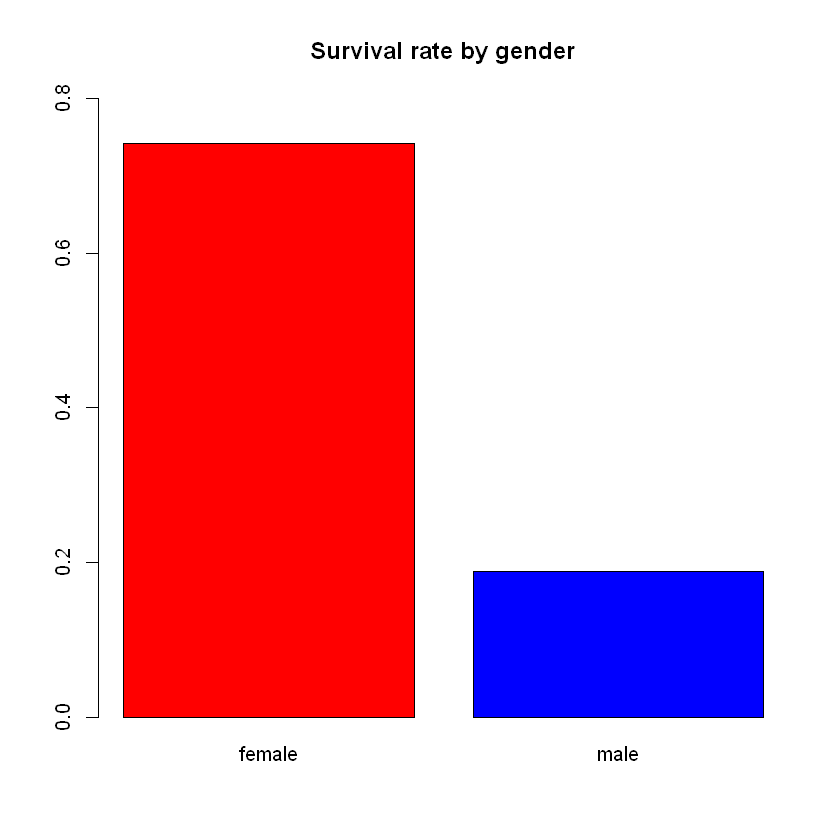

In [28]:
# Anteil Überlebender nach Geschlecht:
(Anteil_Geschlecht<-tapply(df$Survived,df$Sex ,mean))
barplot(Anteil_Geschlecht,col=c('red','blue'),ylim=c(0,0.8),main='Survival rate by gender')

In [40]:
# Binomial test
# H0: Anteil der Überlebender von Frauen pi >=0.75
# H1: pi<0.75
# alpha:0.1
pi<-Anteil_Geschlecht[1]
pi
survival_rate_female<-df$Survived[df$Sex=='female']
n<-length(survival_rate_female)
x<-sum(survival_rate_female)

binom.test(x,n,0.75,alternative='less',conf.level=0.9)
# wegen 0.3933>0.1 kann nicht statistisch nachgewiesen werden ,dass pi < 0.75 

female 
0.7420382


	Exact binomial test

data:  x and n
number of successes = 233, number of trials = 314, p-value = 0.3933
alternative hypothesis: true probability of success is less than 0.75
90 percent confidence interval:
 0.0000000 0.7740497
sample estimates:
probability of success 
             0.7420382 


In [5]:
#eine neue Variable zu generieren, die 1 ist, wenn der Fahrpreis über dem Median war, 
#und 0, falls der Fahrpreis unter dem Median war.
m<-median(df$Fare)
df$above_median<-as.numeric(df$Fare>m)


In [6]:
# Anteil Überlebender nach gruppiertem Fahrpreis:
tapply(df$Survived,df$above_median,FUN=mean)


0         1 
0.2505593 0.5180180

In [7]:
#eine neue Variable zu generieren, die 1 ist, wenn das Alter der jeweiligen Beobachtung vorhanden ist
#und ansonsten den Wert 0 annimmt
df$Alter_bekannt<-as.numeric(!is.na(df$Age))


In [8]:
#Anteil Überlebender nach Verfügbarkeit der Alters-Variablen:
tapply(df$Survived,df$Alter_bekannt,mean)

0         1 
0.2937853 0.4061625